In [ ]:
pip install scikit-learn==1.5.1


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1


In [ ]:
import pandas as pd
df=pd.read_pickle("/content/concatenated_cars.pkl")
df.head(5)



,City,it,ft,bt,km,transmission,ownerNo,owner,oem,model,...,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
0,Bangalore,0,Petrol,Hatchback,"1,20,000",Manual,3,3rd Owner,Maruti,Maruti Celerio,...,150 Kmph,90Nm,No,4.7 metres,"Tubeless, Radial",DOHC,4,2425mm,NaN,1635mm
1,Bangalore,0,Petrol,SUV,"32,706",Manual,2,2nd Owner,Ford,Ford Ecosport,...,NaN,150Nm,No,5.3 metres,"Tubeless,Radial",DOHC,4,2519mm,16,1765mm
2,Bangalore,0,Petrol,Hatchback,"11,949",Manual,1,1st Owner,Tata,Tata Tiago,...,150 kmph,114Nm,No,4.9 meters,Tubeless,DOHC,4,2400mm,14,1647mm
3,Bangalore,0,Petrol,Sedan,"17,794",Manual,1,1st Owner,Hyundai,Hyundai Xcent,...,172km/hr,113.75Nm,No,4.7 metres,"Tubeless,Radial",DOHC,4,2425mm,14,1660mm
4,Bangalore,0,Diesel,SUV,"60,000",Manual,1,1st Owner,Maruti,Maruti SX4 S Cross,...,190 Kmph,200Nm,Yes,5.2 meters,"Tubeless,Radial",DOHC,4,2600mm,16,1785mm


In [ ]:
df['Turbo Charger'] = df['Turbo Charger'].replace({'NO': 'No', 'no': 'No', 'YES': 'Yes', 'yes': 'Yes', 'twin': 'Twin'}).map(lambda x: x if pd.notna(x) else x)

In [ ]:
df["City"].unique()

array(['Bangalore', 'Chennai', 'Delhi', 'Jaipur', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
df["ft"].unique()

array(['Petrol', 'Diesel', 'Lpg', 'Cng', 'Electric'], dtype=object)

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
df.isnull().sum()/len(df)*100

,0
City,0.000000
it,0.000000
ft,0.000000
bt,0.000000
km,0.000000
transmission,0.000000
ownerNo,0.000000
owner,0.000000
oem,0.000000
model,0.000000


In [ ]:
#irrelevant for price prediction and redundant columns been dropped
df.drop(['it', 'owner', 'centralVariantId', 'variantName', 'trendingText.imgUrl',
         'trendingText.heading', 'trendingText.desc', 'Kms Driven', 'priceActual',
         'Ownership', 'RTO', 'Registration Year', 'Seats', 'BoreX Stroke',
         'Year of Manufacture', 'Engine', 'Engine Displacement', 'Max Torque'],
        axis=1, inplace=True)


In [ ]:
# Calculate the percentage of missing values for each column
df_null= df.isnull().mean() * 100

# Find columns with more than 80% missing values
columns_with_nulls = df_null[df_null > 80].index

# Display the columns
print("Columns with more than 80% missing values:")
print(columns_with_nulls)


Columns with more than 80% missing values:
Index(['priceFixedText', 'Ground Clearance Unladen'], dtype='object')


In [ ]:
df.drop(['priceSaving', 'priceFixedText', 'Ground Clearance Unladen'],axis=1,inplace=True)

In [ ]:
df.shape

(8369, 48)

In [ ]:
# Check the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Remove duplicate rows and save back to the same DataFrame
df.drop_duplicates(inplace=True)

# Verify that duplicates are removed
new_num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows after cleaning: {new_num_duplicates}")

# Display the cleaned DataFrame
df.reset_index(drop=True, inplace=True)
pd.set_option('display.max_columns', None)  # View all columns
df.head(2)


Number of duplicate rows: 64
Number of duplicate rows after cleaning: 0


,City,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Insurance Validity,Transmission,Acceleration,Alloy Wheel Size,Cargo Volumn,Color,Compression Ratio,Displacement,Drive Type,Engine Type,Front Brake Type,Front Tread,Fuel Suppy System,Gear Box,Gross Weight,Height,Kerb Weight,Length,Max Power,Mileage,No Door Numbers,No of Cylinder,Rear Brake Type,Rear Tread,Seating Capacity,Steering Type,Super Charger,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
0,Bangalore,Petrol,Hatchback,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,₹ 4 Lakh,Petrol,Third Party insurance,Manual,15.05 Seconds,NaN,235-litres,White,11.0:1,998,FWD,K10B Engine,Ventilated Disc,1420mm,MPFi,5 Speed,1250kg,1565mm,835kg,3715mm,67.04bhp,23.1 kmpl,5,3,Drum,1410mm,5,Power,No,150 Kmph,90Nm,No,4.7 metres,"Tubeless, Radial",DOHC,4,2425mm,NaN,1635mm
1,Bangalore,Petrol,SUV,"32,706",Manual,2,Ford,Ford Ecosport,2018,₹ 8.11 Lakh,Petrol,Comprehensive,Manual,NaN,16,352-litres,White,11.0:1,1497,FWD,Ti-VCT Petrol Engine,Ventilated Disc,NaN,Direct Injection,5 Speed,1660Kg,1647mm,1242Kg,3998mm,121.31bhp,17 kmpl,4,3,Drum,NaN,5,Power,No,NaN,150Nm,No,5.3 metres,"Tubeless,Radial",DOHC,4,2519mm,16,1765mm


In [ ]:
df.shape

(8305, 48)

In [ ]:
import pandas as pd
import re

# Function to handle missing values
def handle_missing_values(df):
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            skewness = df[col].skew()
            if -0.4 <= skewness <= 0.4:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
    return df

# Apply handle_missing_values function to DataFrame
df = handle_missing_values(df)

# Clean column names
df.columns = df.columns.str.strip()

# Verify column names
print("Columns in DataFrame:")
print(df.columns)

# Function to clean and convert price to numeric
def convert_price(val):
    if isinstance(val, str):
        cleaned_val = re.sub(r'[₹,]', '', val).strip()
        if 'Lakh' in cleaned_val:
            cleaned_val = cleaned_val.replace('Lakh', '').strip()
            if cleaned_val:
                return float(cleaned_val) * 100000
        elif 'Crore' in cleaned_val:
            cleaned_val = cleaned_val.replace('Crore', '').strip()
            if cleaned_val:
                return float(cleaned_val) * 10000000
        if cleaned_val:
            return float(cleaned_val)
    return val

# Function to extract digits from strings
def extract_digits(val):
    if isinstance(val, str):
        return re.sub(r'[^\d.]', '', val)  # Keep digits and decimal points
    return val

# List of columns to apply extraction to
columns_to_extract = [
    'Acceleration', 'km', 'Cargo Volumn', 'Front Tread', 'Gear Box',
    'Gross Weight', 'Height', 'Kerb Weight', 'Length', 'Max Power', 'Mileage',
    'Rear Tread', 'Top Speed', 'Torque', 'Turning Radius', 'Wheel Base', 'Width'
]

# Apply price conversion
df['price'] = df['price'].apply(convert_price)

# Check for missing columns
missing_cols = [col for col in columns_to_extract if col not in df.columns]
if missing_cols:
    print(f"Missing columns: {missing_cols}")

# Apply extraction to all specified columns
for col in columns_to_extract:
    if col in df.columns:
        df[col] = df[col].apply(lambda x: extract_digits(x))
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Remove ':1' from 'Compression Ratio' and convert to float
if 'Compression Ratio' in df.columns:
    df['Compression Ratio'] = df['Compression Ratio'].str.replace(':1', '', regex=False)

# Convert all columns to numeric (either int or float)
for col in columns_to_extract + ['Compression Ratio', 'price']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to int/float and handle errors
    else:
        print(f"Column '{col}' not found in DataFrame.")

# Display the updated DataFrame
pd.set_option('display.max_columns', None)  # Ensure all columns are displayed
print(df.head(2))


Columns in DataFrame:
Index(['City', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'price', 'Fuel Type', 'Insurance Validity', 'Transmission',
       'Acceleration', 'Alloy Wheel Size', 'Cargo Volumn', 'Color',
       'Compression Ratio', 'Displacement', 'Drive Type', 'Engine Type',
       'Front Brake Type', 'Front Tread', 'Fuel Suppy System', 'Gear Box',
       'Gross Weight', 'Height', 'Kerb Weight', 'Length', 'Max Power',
       'Mileage', 'No Door Numbers', 'No of Cylinder', 'Rear Brake Type',
       'Rear Tread', 'Seating Capacity', 'Steering Type', 'Super Charger',
       'Top Speed', 'Torque', 'Turbo Charger', 'Turning Radius', 'Tyre Type',
       'Value Configuration', 'Values per Cylinder', 'Wheel Base',
       'Wheel Size', 'Width'],
      dtype='object')
        City      ft         bt      km transmission  ownerNo     oem  \
0  Bangalore  Petrol  Hatchback  120000       Manual        3  Maruti   
1  Bangalore  Petrol        SUV   32706   

In [ ]:
df.shape

(8305, 48)

In [ ]:
df.head(2)

,City,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Insurance Validity,Transmission,Acceleration,Alloy Wheel Size,Cargo Volumn,Color,Compression Ratio,Displacement,Drive Type,Engine Type,Front Brake Type,Front Tread,Fuel Suppy System,Gear Box,Gross Weight,Height,Kerb Weight,Length,Max Power,Mileage,No Door Numbers,No of Cylinder,Rear Brake Type,Rear Tread,Seating Capacity,Steering Type,Super Charger,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
0,Bangalore,Petrol,Hatchback,120000,Manual,3,Maruti,Maruti Celerio,2015,400000.0,Petrol,Third Party insurance,Manual,15.05,16,235,White,11.0,998,FWD,K10B Engine,Ventilated Disc,1420,MPFi,5.0,1250.0,1565,835.0,3715,67.04,23.1,5,3,Drum,1410,5,Power,No,150.0,90.0,No,4.7,"Tubeless, Radial",DOHC,4,2425,16,1635
1,Bangalore,Petrol,SUV,32706,Manual,2,Ford,Ford Ecosport,2018,811000.0,Petrol,Comprehensive,Manual,10.00,16,352,White,11.0,1497,FWD,Ti-VCT Petrol Engine,Ventilated Disc,1295,Direct Injection,5.0,1660.0,1647,1242.0,3998,121.31,17.0,4,3,Drum,1290,5,Power,No,165.0,150.0,No,5.3,"Tubeless,Radial",DOHC,4,2519,16,1765


In [ ]:
# Define a function to clean and convert columns
def clean_numeric(column):
    # Extract numeric values from strings
    df[column] = df[column].str.extract(r'(\d+\.?\d*)')[0].astype(float)

# Apply the function to relevant columns
columns_to_clean = [
    'Alloy Wheel Size',
    'Displacement',
    'Seating Capacity',
    'Wheel Size',
    'No Door Numbers'
]

for col in columns_to_clean:
    clean_numeric(col)

print(df.head(2))


        City      ft         bt      km transmission  ownerNo     oem  \
0  Bangalore  Petrol  Hatchback  120000       Manual        3  Maruti   
1  Bangalore  Petrol        SUV   32706       Manual        2    Ford   

            model  modelYear     price Fuel Type     Insurance Validity  \
0  Maruti Celerio       2015  400000.0    Petrol  Third Party insurance   
1   Ford Ecosport       2018  811000.0    Petrol          Comprehensive   

  Transmission  Acceleration  Alloy Wheel Size  Cargo Volumn  Color  \
0       Manual         15.05              16.0           235  White   
1       Manual         10.00              16.0           352  White   

   Compression Ratio  Displacement Drive Type           Engine Type  \
0               11.0         998.0        FWD           K10B Engine   
1               11.0        1497.0        FWD  Ti-VCT Petrol Engine   

  Front Brake Type  Front Tread Fuel Suppy System  Gear Box  Gross Weight  \
0  Ventilated Disc         1420              MPFi

In [ ]:
df2=df.copy()

In [ ]:
df2.columns

Index(['City', 'ft', 'bt', 'km', 'transmission', 'ownerNo', 'oem', 'model',
       'modelYear', 'price', 'Fuel Type', 'Insurance Validity', 'Transmission',
       'Acceleration', 'Alloy Wheel Size', 'Cargo Volumn', 'Color',
       'Compression Ratio', 'Displacement', 'Drive Type', 'Engine Type',
       'Front Brake Type', 'Front Tread', 'Fuel Suppy System', 'Gear Box',
       'Gross Weight', 'Height', 'Kerb Weight', 'Length', 'Max Power',
       'Mileage', 'No Door Numbers', 'No of Cylinder', 'Rear Brake Type',
       'Rear Tread', 'Seating Capacity', 'Steering Type', 'Super Charger',
       'Top Speed', 'Torque', 'Turbo Charger', 'Turning Radius', 'Tyre Type',
       'Value Configuration', 'Values per Cylinder', 'Wheel Base',
       'Wheel Size', 'Width'],
      dtype='object')

In [ ]:
# Select columns with non-object dtype
non_object_columns = df.select_dtypes(exclude=['object'])

# Get value counts for each non-object column
value_counts = {col: df[col].value_counts() for col in non_object_columns.columns}

# Print the value counts
for col, counts in value_counts.items():
    print(f"Value counts for {col}:\n{counts}\n")

Streaming output truncated to the last 5000 lines.
866000.0        2
468000.0        2
1065000.0       2
3375000.0       2
786000.0        2
368000.0        2
149000.0        2
5900000.0       2
1040000.0       2
1012000.0       2
791000.0        2
482000.0        2
1470000.0       2
652000.0        2
1026000.0       2
506000.0        2
2375000.0       2
641000.0        2
2095000.0       2
705000.0        2
386000.0        2
764000.0        2
1268000.0       2
196000.0        2
805000.0        2
228000.0        2
391000.0        2
872000.0        2
956000.0        2
829000.0        2
779000.0        2
922000.0        2
3350000.0       2
964000.0        2
198000.0        2
824000.0        2
7900000.0       2
989000.0        2
1033000.0       2
1685000.0       2
742000.0        2
314000.0        2
189000.0        2
1052000.0       2
141000.0        2
754000.0        2
944000.0        2
759000.0        2
1124000.0       2
1749000.0       2
2490000.0       2
763000.0        2
6900000.0    

In [ ]:
#Frequency Encoding
#Encode Displacement based on the frequency of each unique value. This method assigns a value to each unique Displacement based on how frequently it appears.
# Calculate frequency encoding
# Calculate frequency encoding for training data
frequency = df['Displacement'].value_counts()



# Define the ranges and corresponding categories
def map_frequency_to_category(freq):
    if freq >= 1000:
        return 'Very High'
    elif 500 <= freq < 1000:
        return 'High'
    elif 200 <= freq < 500:
        return 'Medium'
    elif 100 <= freq < 200:
        return 'Low'
    else:
        return 'Very Low'

# Apply the function to map frequencies to categories
df['Displacement'] = df['Displacement'].map(frequency)
df['Displacement'] = df['Displacement'].apply(map_frequency_to_category)

print(df.head(10))


        City      ft         bt      km transmission  ownerNo      oem  \
0  Bangalore  Petrol  Hatchback  120000       Manual        3   Maruti   
1  Bangalore  Petrol        SUV   32706       Manual        2     Ford   
2  Bangalore  Petrol  Hatchback   11949       Manual        1     Tata   
3  Bangalore  Petrol      Sedan   17794       Manual        1  Hyundai   
4  Bangalore  Diesel        SUV   60000       Manual        1   Maruti   
5  Bangalore  Diesel        SUV   20000       Manual        1     Jeep   
6  Bangalore  Petrol  Hatchback   37772       Manual        1   Datsun   
7  Bangalore  Petrol        SUV   30000    Automatic        1  Hyundai   
8  Bangalore  Petrol      Sedan   37000    Automatic        1   Maruti   
9  Bangalore  Petrol  Hatchback   11949       Manual        1     Tata   

                model  modelYear      price Fuel Type     Insurance Validity  \
0      Maruti Celerio       2015   400000.0    Petrol  Third Party insurance   
1       Ford Ecosport    

In [ ]:
from google.colab import files

# Create a copy of the DataFrame (example)
df2 = df.copy()

# Save DataFrame to a CSV file
df2.to_csv('df2.csv', index=False)

# Download the CSV file
files.download('df2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

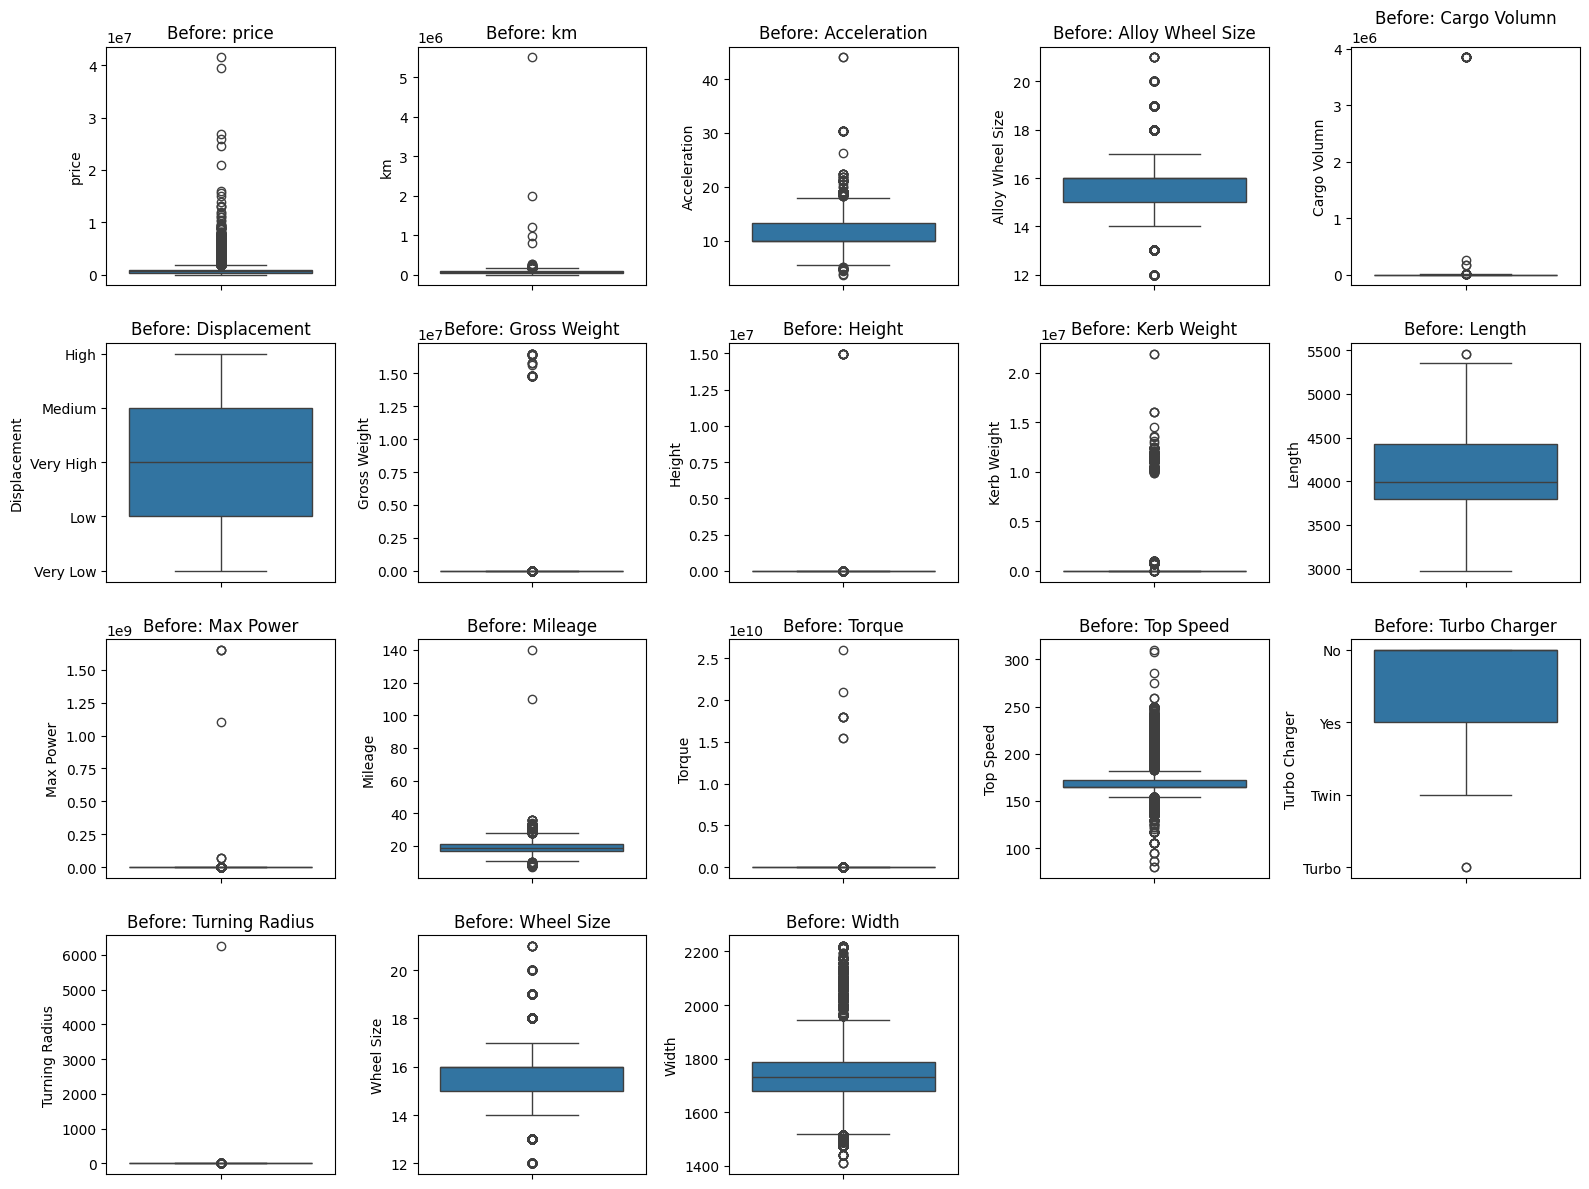

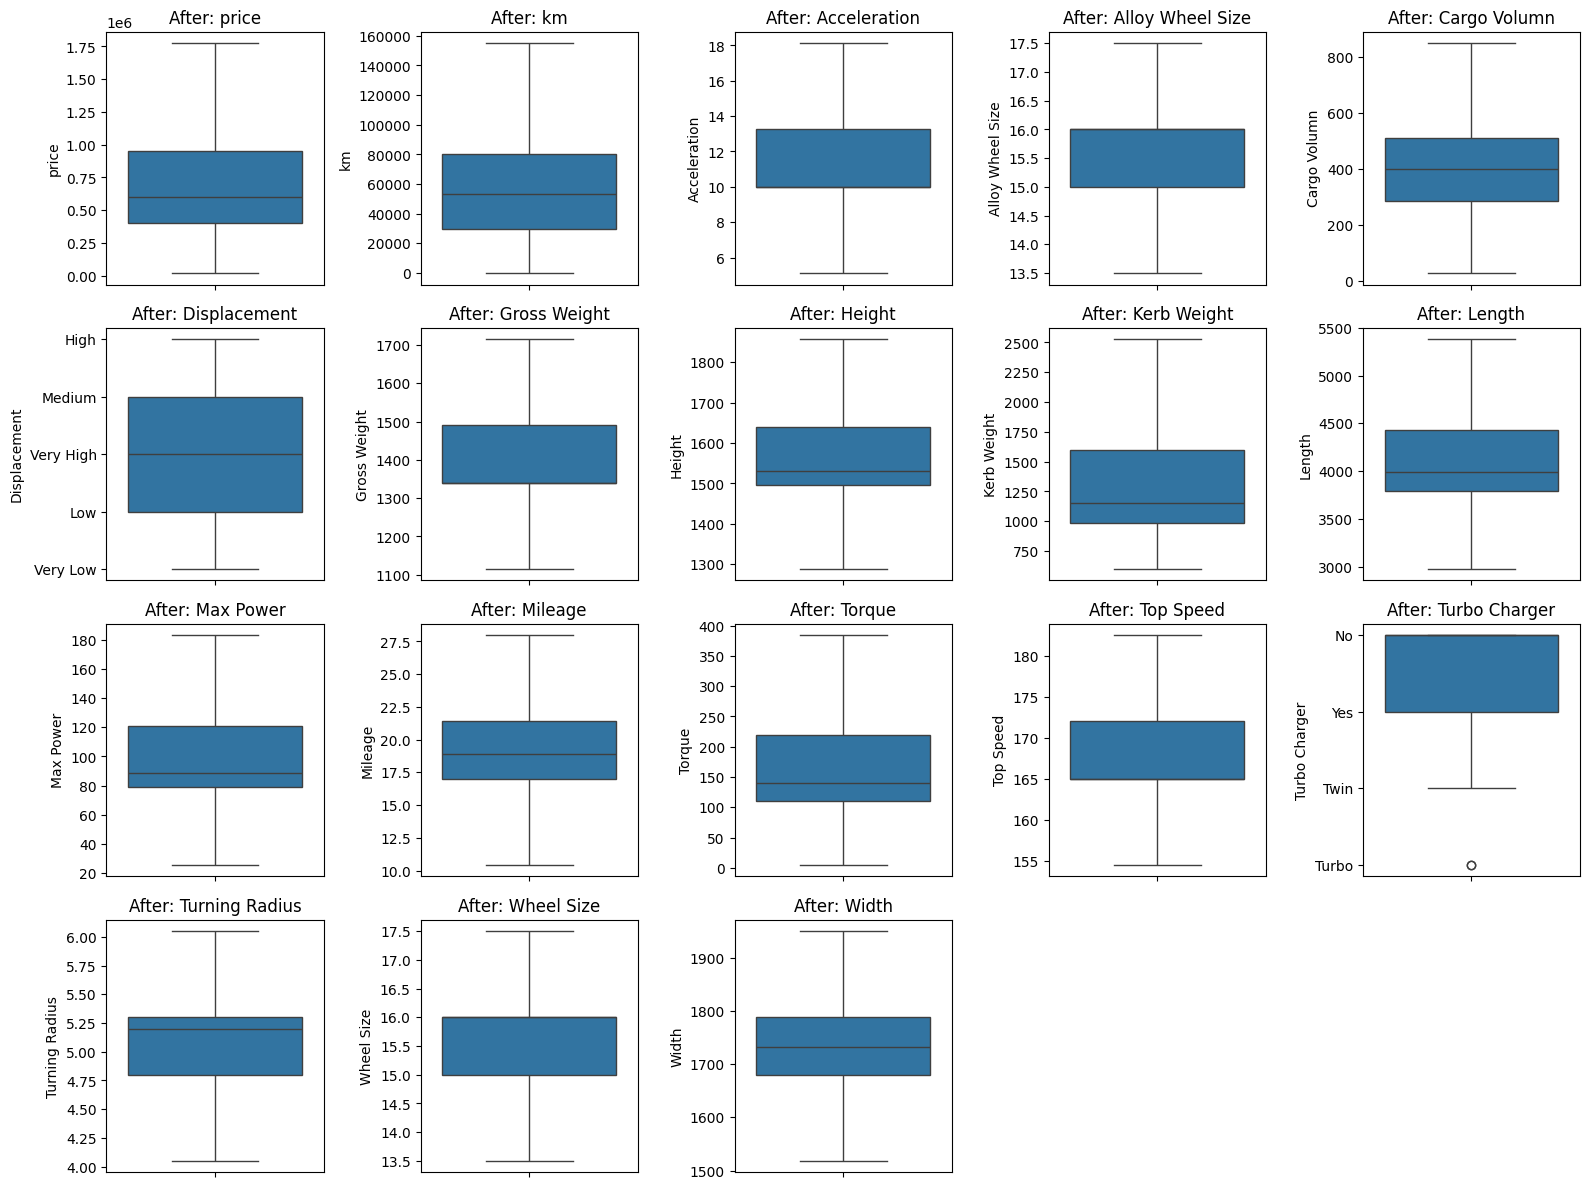

Dropped columns: []
Remaining rows: 8305
        City      ft         bt        km transmission  ownerNo     oem  \
0  Bangalore  Petrol  Hatchback  120000.0       Manual        3  Maruti   
1  Bangalore  Petrol        SUV   32706.0       Manual        2    Ford   

            model  modelYear     price Fuel Type     Insurance Validity  \
0  Maruti Celerio       2015  400000.0    Petrol  Third Party insurance   
1   Ford Ecosport       2018  811000.0    Petrol          Comprehensive   

  Transmission  Acceleration  Alloy Wheel Size  Cargo Volumn  Color  \
0       Manual         15.05              16.0         235.0  White   
1       Manual         10.00              16.0         352.0  White   

   Compression Ratio Displacement Drive Type           Engine Type  \
0               11.0         High        FWD           K10B Engine   
1               11.0       Medium        FWD  Ti-VCT Petrol Engine   

  Front Brake Type  Front Tread Fuel Suppy System  Gear Box  Gross Weight  \
0  Ve

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame df
# df = pd.read_csv('your_dataset.csv')  # Replace with your dataset

# List of numeric columns to check for outliers
numeric_columns = [
    'price', 'km', 'Acceleration', 'Alloy Wheel Size', 'Cargo Volumn',
    'Compression Ratio', 'Displacement', 'Gross Weight', 'Height',
    'Kerb Weight', 'Length', 'Max Power', 'Mileage', 'Torque',
    'Top Speed', 'Turbo Charger', 'Turning Radius', 'Wheel Size', 'Width'
]

# Exclude 'Compression Ratio' for plotting
numeric_columns_to_plot = [col for col in numeric_columns if col != 'Compression Ratio']

# Check if columns exist in the DataFrame
existing_columns = [col for col in numeric_columns_to_plot if col in df.columns]

# Plot boxplots before removing outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(existing_columns, 1):
    plt.subplot(4, 5, i)  # Adjust subplot grid size as needed
    sns.boxplot(df[col])
    plt.title(f'Before: {col}')
plt.tight_layout()
plt.show()

# Detect outliers using IQR and apply capping/flooring
for col in existing_columns:
    if df[col].dtype in [np.int64, np.float64]:  # Apply only to numeric columns
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# Drop columns with a single unique value
columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=columns_to_drop)

# Plot boxplots after removing outliers
plt.figure(figsize=(16, 12))
for i, col in enumerate(existing_columns, 1):
    plt.subplot(4, 5, i)  # Adjust subplot grid size as needed
    sns.boxplot(df[col])
    plt.title(f'After: {col}')
plt.tight_layout()
plt.show()

# Display the cleaned DataFrame and dropped columns
print("Dropped columns:", columns_to_drop)
print(f"Remaining rows: {df.shape[0]}")
print(df.head(2))


In [ ]:
df.isnull().sum()/len(df)*100

,0
City,0.000000
ft,0.000000
bt,0.000000
km,0.000000
transmission,0.000000
ownerNo,0.000000
oem,0.000000
model,0.000000
modelYear,0.000000
price,0.000000


In [ ]:
#numerical columns, so you might consider using the median if the data is skewed, or the mean if it is normally distributed.
df['Kerb Weight'].fillna(df['Kerb Weight'].median(), inplace=True)
df['Top Speed'].fillna(df['Top Speed'].median(), inplace=True)
df['Turning Radius'].fillna(df['Turning Radius'].median(), inplace=True)
df['Compression Ratio'].fillna(df['Compression Ratio'].mean(), inplace=True)
#Since this percentage is still relatively low, you can impute using the mode (most common value), especially since Gear Box is likely a categorical feature.
df['Gear Box'].fillna(df['Gear Box'].mode()[0], inplace=True)

In [ ]:
df.isnull().sum()/len(df)*100

,0
City,0.0
ft,0.0
bt,0.0
km,0.0
transmission,0.0
ownerNo,0.0
oem,0.0
model,0.0
modelYear,0.0
price,0.0


In [ ]:
df.duplicated().sum()

4

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
#encoding toconvert categorical to numeric values for statistical analysis
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()


In [ ]:
for i in df.select_dtypes(include="object").columns:
    df[i]=enc.fit_transform(df[i])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8301 entries, 0 to 8304
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 8301 non-null   int64  
 1   ft                   8301 non-null   int64  
 2   bt                   8301 non-null   int64  
 3   km                   8301 non-null   float64
 4   transmission         8301 non-null   int64  
 5   ownerNo              8301 non-null   int64  
 6   oem                  8301 non-null   int64  
 7   model                8301 non-null   int64  
 8   modelYear            8301 non-null   int64  
 9   price                8301 non-null   float64
 10  Fuel Type            8301 non-null   int64  
 11  Insurance Validity   8301 non-null   int64  
 12  Transmission         8301 non-null   int64  
 13  Acceleration         8301 non-null   float64
 14  Alloy Wheel Size     8301 non-null   float64
 15  Cargo Volumn         8301 non-null   float6

In [ ]:
df.head(10)

,City,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Insurance Validity,Transmission,Acceleration,Alloy Wheel Size,Cargo Volumn,Color,Compression Ratio,Displacement,Drive Type,Engine Type,Front Brake Type,Front Tread,Fuel Suppy System,Gear Box,Gross Weight,Height,Kerb Weight,Length,Max Power,Mileage,No Door Numbers,No of Cylinder,Rear Brake Type,Rear Tread,Seating Capacity,Steering Type,Super Charger,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
0,0,4,3,120000.0,1,3,20,160,2015,400000.0,4,5,1,15.05,16.0,235.0,138,11.0,0,12,293,22,1420,53,5.0,1250.0,1565.0,835.0,3715.0,67.04,23.10,5.0,3,7,1410,5.0,6,1,154.5,90.00,0,4.7,23,3,4,2425,16.0,1635.0
1,0,4,8,32706.0,1,2,6,50,2018,811000.0,4,2,1,10.00,16.0,352.0,138,11.0,2,12,396,22,1295,23,5.0,1660.0,1647.0,1242.0,3998.0,121.31,17.00,4.0,3,7,1290,5.0,6,1,165.0,150.00,0,5.3,26,3,4,2519,16.0,1765.0
2,0,4,3,11949.0,1,1,29,273,2018,585000.0,4,2,1,14.30,14.0,242.0,110,10.8,2,12,355,5,1400,53,5.0,1340.0,1535.0,1012.0,3746.0,84.00,23.84,5.0,3,7,1420,5.0,6,1,154.5,114.00,0,4.9,13,3,4,2400,14.0,1647.0
3,0,4,9,17794.0,1,1,9,87,2014,462000.0,4,2,1,14.20,14.0,407.0,86,10.5,3,13,320,6,1479,23,5.0,1340.0,1520.0,1180.0,3995.0,81.86,19.10,4.0,4,7,1493,5.0,6,1,172.0,113.75,0,4.7,26,3,4,2425,14.0,1660.0
4,0,1,8,60000.0,1,1,20,178,2015,790000.0,1,5,1,12.00,16.0,353.0,55,10.5,2,12,218,22,1295,49,5.0,1670.0,1595.0,1230.0,4300.0,88.50,23.65,5.0,4,21,1290,5.0,6,1,182.5,200.00,3,5.2,26,3,4,2600,16.0,1785.0
5,0,1,8,20000.0,1,1,12,101,2020,1775000.0,1,5,1,10.00,17.0,408.0,86,10.5,1,5,124,5,1295,4,6.0,1340.0,1640.0,1551.0,4395.0,170.00,17.10,5.0,4,6,1290,5.0,8,1,165.0,350.00,3,5.3,6,3,4,2636,17.0,1818.0
6,0,4,3,37772.0,1,1,4,37,2017,345000.0,4,2,1,13.30,16.0,265.0,57,10.5,2,12,344,0,1440,40,5.0,1340.0,1490.0,1070.0,3785.0,67.00,20.63,5.0,3,7,1445,5.0,6,1,154.5,104.00,0,4.6,13,3,4,2450,16.0,1635.0
7,0,4,8,30000.0,0,1,9,85,2021,1200000.0,4,5,0,10.00,16.0,350.0,86,10.5,0,12,278,5,1295,42,7.0,1340.0,1605.0,1440.0,3995.0,118.35,18.15,5.0,3,7,1290,5.0,6,1,165.0,171.60,3,5.3,0,3,4,2500,16.0,1770.0
8,0,4,9,37000.0,0,1,20,163,2018,960000.0,4,2,0,10.00,16.0,510.0,66,10.5,1,12,479,22,1295,49,4.0,1530.0,1485.0,1105.0,4490.0,103.25,20.28,4.0,4,7,1290,5.0,6,1,165.0,138.00,0,5.4,23,3,4,2650,16.0,1730.0
9,0,4,3,11949.0,1,1,29,273,2017,585000.0,4,2,1,14.30,16.0,242.0,110,10.8,2,12,355,5,1400,53,5.0,1340.0,1535.0,1012.0,3746.0,84.00,23.84,5.0,3,7,1420,5.0,6,1,154.5,114.00,0,4.9,13,3,4,2400,16.0,1647.0


In [ ]:
df['City'].unique()

array([0, 1, 2, 4, 5, 3])

In [ ]:
#df.drop(['Compression Ratio'],axis=1,inplace=True)

In [ ]:
df.shape

(8301, 48)

In [ ]:
df.corr()

,City,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Insurance Validity,Transmission,Acceleration,Alloy Wheel Size,Cargo Volumn,Color,Compression Ratio,Displacement,Drive Type,Engine Type,Front Brake Type,Front Tread,Fuel Suppy System,Gear Box,Gross Weight,Height,Kerb Weight,Length,Max Power,Mileage,No Door Numbers,No of Cylinder,Rear Brake Type,Rear Tread,Seating Capacity,Steering Type,Super Charger,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
City,1.000000,-0.016123,-0.004598,-0.023775,0.097880,-0.058896,0.002075,-0.006046,-0.007519,-0.132643,-0.016123,0.044829,0.097880,0.059465,-0.035840,-0.009237,-0.039605,0.019109,-0.031418,-0.013347,-0.035890,0.022235,-0.060047,-0.016915,-0.007106,-0.033709,-0.003501,-0.040750,-0.051924,-0.063687,0.041939,-0.007505,-0.054673,-0.010288,-0.059686,0.002479,0.012680,-0.008918,-0.067906,-0.031804,-0.013019,-0.054672,0.013622,0.000888,-0.022685,-0.058283,-0.035840,-0.080428
ft,-0.016123,1.000000,-0.302336,-0.317437,0.078159,-0.047062,-0.018955,-0.040057,0.054849,-0.304875,1.000000,-0.007714,0.078159,0.099296,-0.241170,-0.195785,0.001484,-0.362618,0.037917,0.060746,-0.018969,-0.093489,-0.121072,0.767201,-0.119639,-0.373141,-0.307265,-0.203933,-0.400537,-0.329896,-0.090220,0.019110,-0.248815,-0.018969,-0.120613,-0.300323,-0.205446,-0.034271,-0.161240,-0.622942,-0.701590,-0.374084,-0.087433,0.147845,0.016105,-0.405458,-0.241170,-0.422600
bt,-0.004598,-0.302336,1.000000,0.046360,-0.254839,-0.033781,-0.090443,-0.073593,0.096227,0.464839,-0.302336,-0.014270,-0.254839,-0.341449,0.328921,0.502433,-0.031605,0.102170,0.095693,-0.053369,0.133986,0.058402,0.045259,-0.286808,0.127640,0.398076,0.152390,0.274135,0.704070,0.571831,-0.346982,-0.539227,0.292645,0.030537,0.038267,0.096003,0.033135,0.020398,0.391460,0.512952,0.417818,0.547955,0.143881,0.055721,0.008907,0.525304,0.328921,0.556194
km,-0.023775,-0.317437,0.046360,1.000000,0.163250,0.272016,0.006612,0.020283,-0.545026,-0.286083,-0.317437,0.081060,0.163250,0.160304,-0.197844,0.037269,0.054939,0.193597,0.035000,-0.006445,0.151218,0.161451,0.109045,-0.296760,-0.045844,0.155230,0.005377,-0.062255,0.072499,-0.015661,-0.002568,-0.096778,0.107334,0.044250,0.107119,0.128556,0.304146,0.018112,0.040909,0.062222,0.156638,0.032390,0.112461,0.066959,-0.052865,0.015942,-0.197844,-0.016131
transmission,0.097880,0.078159,-0.254839,0.163250,1.000000,0.044986,0.058594,0.042088,-0.196832,-0.558403,0.078159,0.034920,1.000000,0.320480,-0.370813,-0.209690,0.038979,0.042522,-0.120322,0.058519,0.024174,0.009301,-0.225469,0.091516,-0.224718,-0.200684,-0.061479,-0.235583,-0.406222,-0.489531,0.289523,0.102741,-0.203180,-0.051089,-0.224871,0.006483,0.000333,-0.045185,-0.318517,-0.411053,-0.223489,-0.355457,-0.052462,0.097678,-0.060502,-0.432296,-0.370813,-0.406771
ownerNo,-0.058896,-0.047062,-0.033781,0.272016,0.044986,1.000000,-0.038900,-0.029174,-0.388883,-0.213274,-0.047062,0.036099,0.044986,0.094041,-0.168912,0.033575,0.025848,0.049832,0.075457,0.009292,0.056717,0.077346,0.031661,-0.060979,-0.001068,0.034016,-0.068355,-0.061134,-0.021671,-0.009378,-0.087871,-0.078141,0.036053,0.026556,0.031372,0.011788,0.158605,0.016869,-0.011199,-0.035264,-0.030435,-0.020100,0.087496,0.093962,-0.040454,-0.047681,-0.168912,-0.076934
oem,0.002075,-0.018955,-0.090443,0.006612,0.058594,-0.038900,1.000000,0.988966,0.092187,-0.032963,-0.018955,0.028941,0.058594,0.080127,0.002437,-0.073131,-0.000136,-0.013926,0.093999,0.041605,-0.248333,-0.013167,-0.023994,-0.015182,-0.023736,0.186788,0.115776,0.071337,-0.040405,-0.146580,0.072465,0.112253,-0.198643,0.005425,-0.021775,0.133918,-0.097005,-0.036878,-0.173338,-0.061893,0.052945,-0.100642,0.090870,-0.258651,0.030502,-0.070592,0.002437,-0.048342
model,-0.006046,-0.040057,-0.073593,0.020283,0.042088,-0.029174,0.988966,1.000000,0.075433,-0.007691,-0.040057,0.028737,0.042088,0.049148,0.001493,-0.061385,-0.000058,-0.006822,0.118305,0.052783,-0.262759,-0.00555

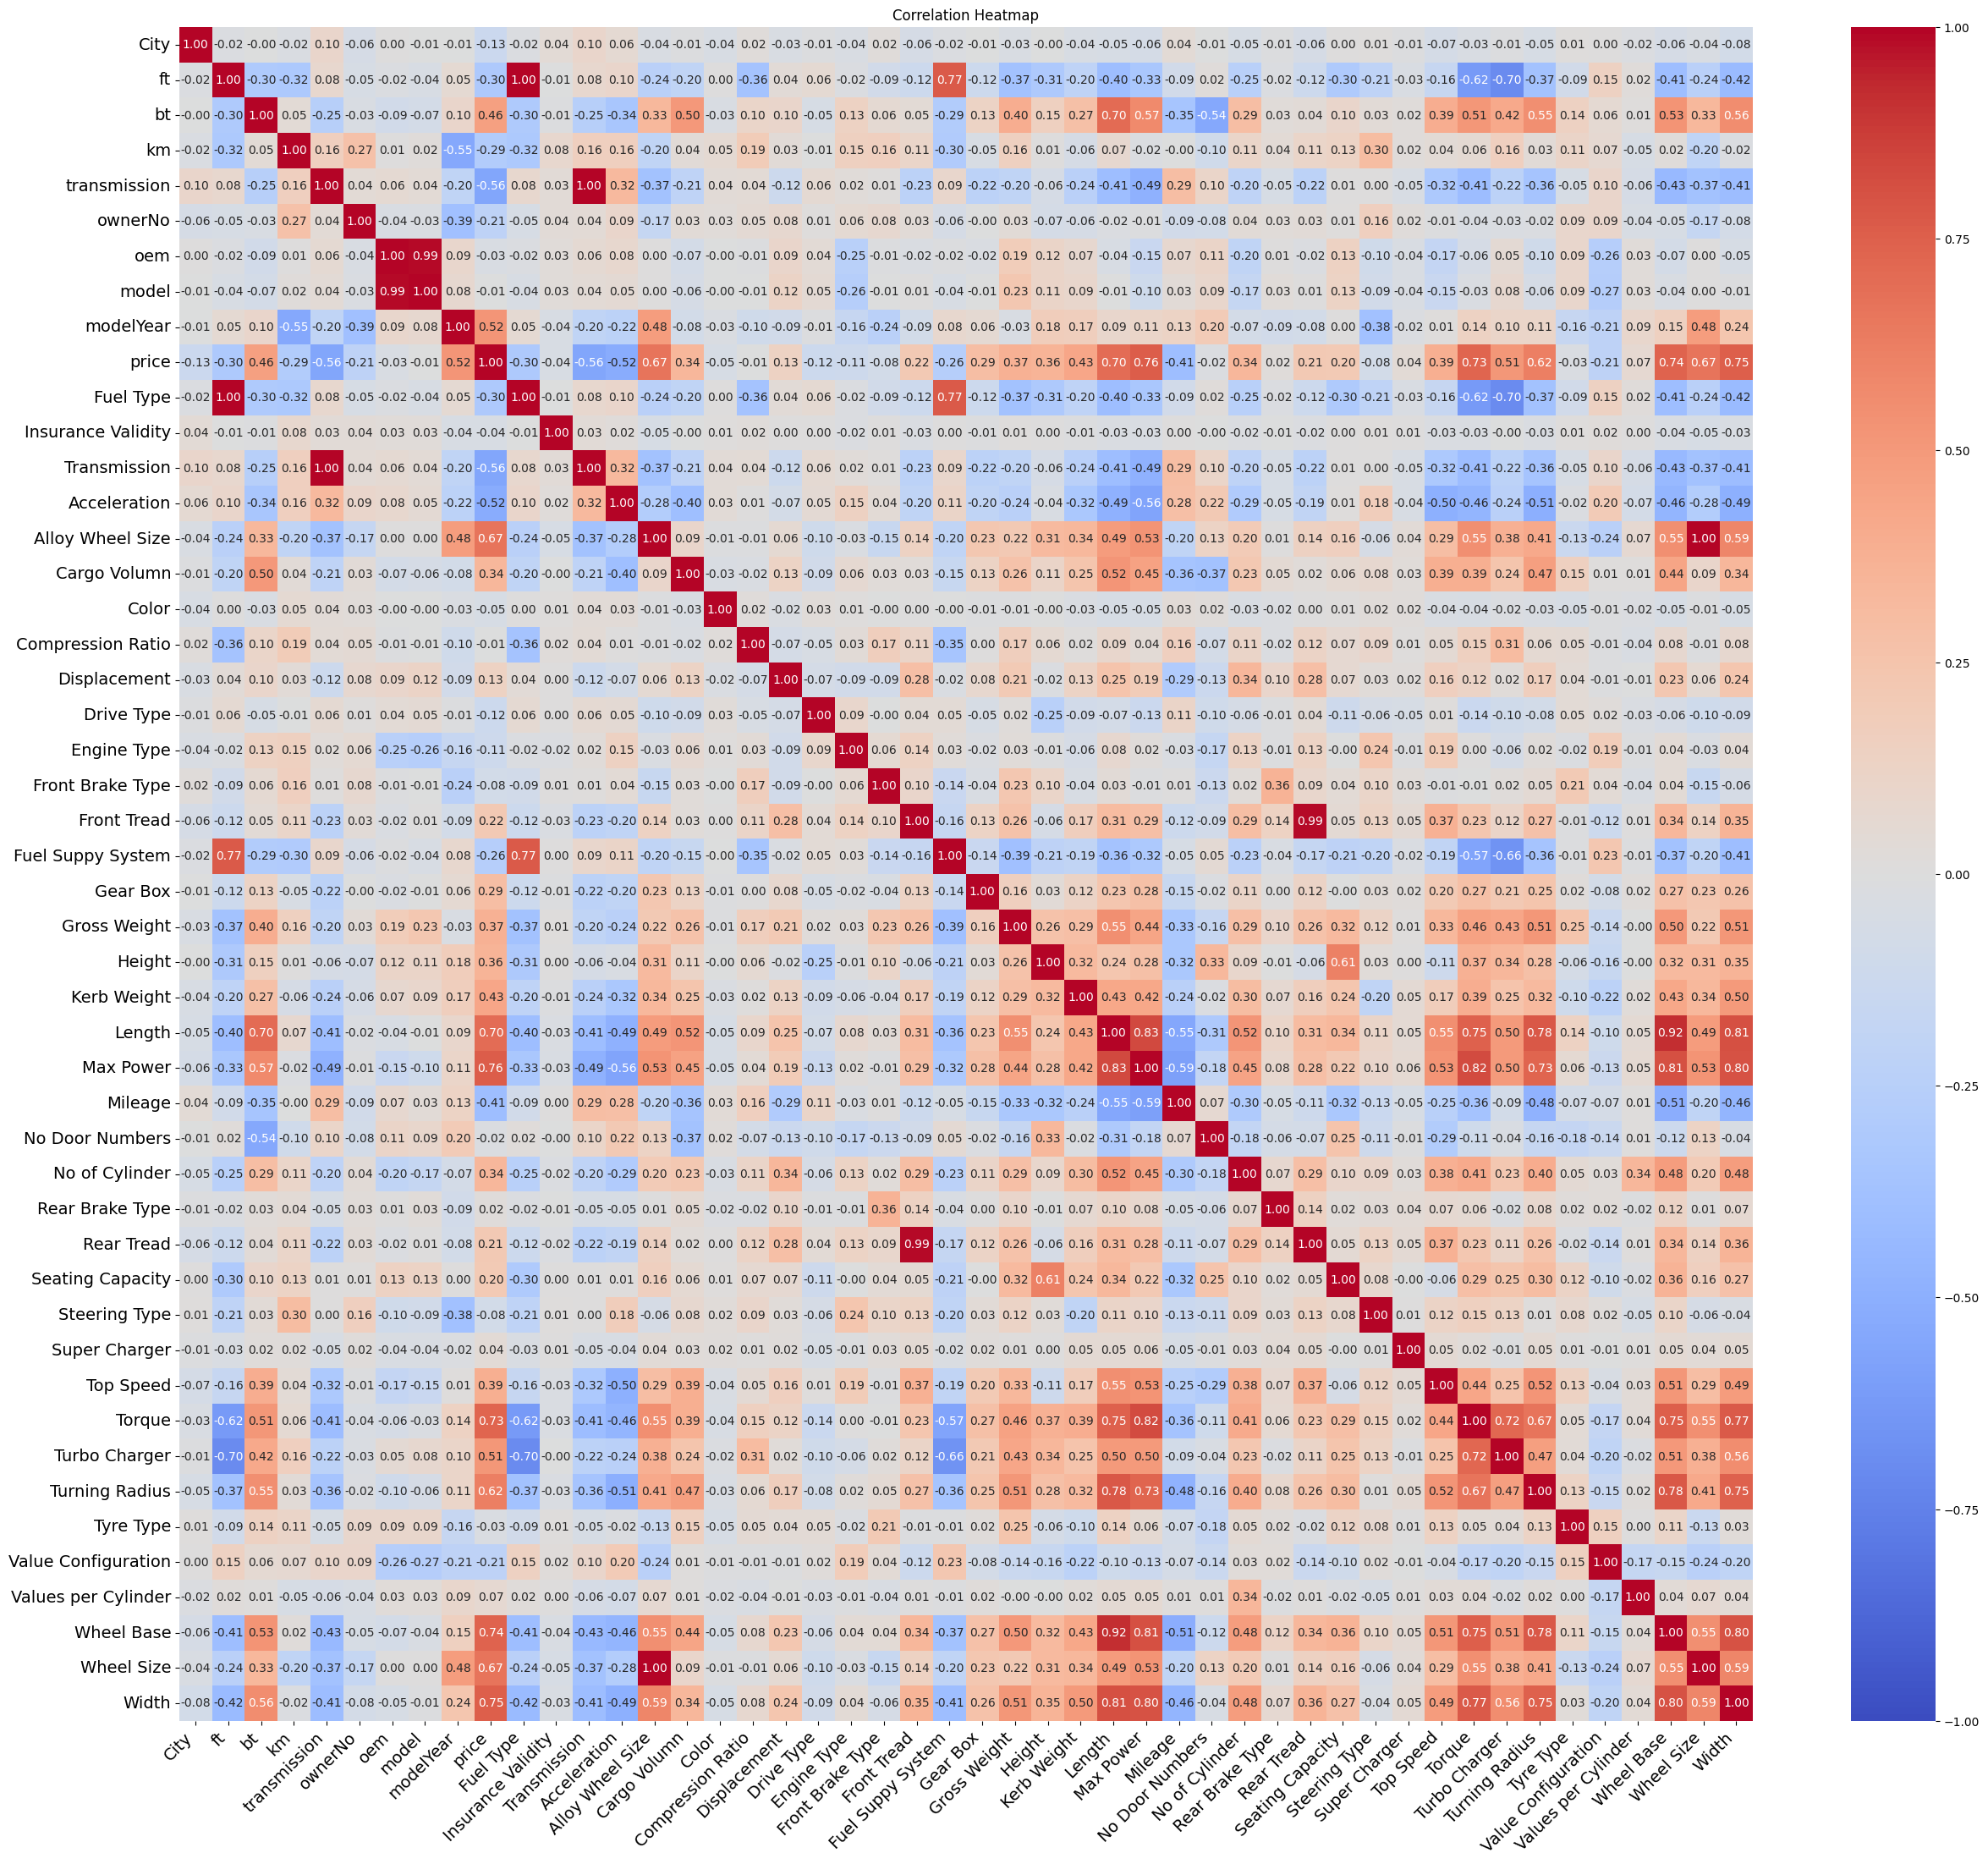

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 26))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x labels
plt.yticks(rotation=0, fontsize=14)  # Rotate y labels
# Add a title
plt.title('Correlation Heatmap')

# Display the heatmap
plt.show()

In [ ]:
df.head(2)

,City,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Insurance Validity,Transmission,Acceleration,Alloy Wheel Size,Cargo Volumn,Color,Compression Ratio,Displacement,Drive Type,Engine Type,Front Brake Type,Front Tread,Fuel Suppy System,Gear Box,Gross Weight,Height,Kerb Weight,Length,Max Power,Mileage,No Door Numbers,No of Cylinder,Rear Brake Type,Rear Tread,Seating Capacity,Steering Type,Super Charger,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
0,0,4,3,120000.0,1,3,20,160,2015,400000.0,4,5,1,15.05,16.0,235.0,138,11.0,0,12,293,22,1420,53,5.0,1250.0,1565.0,835.0,3715.0,67.04,23.1,5.0,3,7,1410,5.0,6,1,154.5,90.0,0,4.7,23,3,4,2425,16.0,1635.0
1,0,4,8,32706.0,1,2,6,50,2018,811000.0,4,2,1,10.00,16.0,352.0,138,11.0,2,12,396,22,1295,23,5.0,1660.0,1647.0,1242.0,3998.0,121.31,17.0,4.0,3,7,1290,5.0,6,1,165.0,150.0,0,5.3,26,3,4,2519,16.0,1765.0


In [ ]:
#Statistical analysis
from scipy import stats
cont = []
cat = []
for i in df.columns:
  if df[i].nunique()>10:
    cont.append(i)
  else:
    cat.append(i)

In [ ]:
print(cont)
print(cat)

['bt', 'km', 'oem', 'model', 'modelYear', 'price', 'Acceleration', 'Cargo Volumn', 'Color', 'Compression Ratio', 'Drive Type', 'Engine Type', 'Front Brake Type', 'Front Tread', 'Fuel Suppy System', 'Gross Weight', 'Height', 'Kerb Weight', 'Length', 'Max Power', 'Mileage', 'Rear Brake Type', 'Rear Tread', 'Top Speed', 'Torque', 'Turning Radius', 'Tyre Type', 'Value Configuration', 'Wheel Base', 'Width']
['City', 'ft', 'transmission', 'ownerNo', 'Fuel Type', 'Insurance Validity', 'Transmission', 'Alloy Wheel Size', 'Displacement', 'Gear Box', 'No Door Numbers', 'No of Cylinder', 'Seating Capacity', 'Steering Type', 'Super Charger', 'Turbo Charger', 'Values per Cylinder', 'Wheel Size']


In [ ]:
df1=df.copy()

In [ ]:
def two_sample(d1,d2):
  m =[0,0]
  for i in range(31):
    sample1 = d1.sample(frac=0.03)
    sample2 = d2.sample(frac=0.04)
    t_test, p_value = stats.ttest_ind(sample1,sample2)
    if p_value < 0.04:
      #print("H0 Reject null hypothesis, Ha accepts alternate hypothesis ,  data is not normally distributed")
      m[1]+=1
    else:
      #print("H0 accept null hypothesis, Ha rejects alternate hypothesis,  data is normally distributed")
      m[0]+=1
    if m[0]>m[1]:
      return True
    elif m[0]<m[1]:
      return False

def chi_square(d1,d2):
  return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1]<0.075 else False

def annova(d1,d2): #assume d1 - continous, d2 - category
  group = df[d2].unique()

  data1 = {}
  for i in group:
    data1[i]=df[d1][df[d2]==i]


  f_value , p_value = stats.f_oneway(*[i for i in data1.values()])
  if p_value<0.075:
    #print("H0 Reject null hypothesis, Ha accepts alternate hypothesis , no connection of the data")
    return False
  else:
    #print("H0 accept null hypothesis, Ha rejects alternate hypothesis, connection present in the data")
    return True


In [ ]:
final = {}
for i in df.columns:
  final[i] = {}
  for j in df.columns:

    if i in cont and j in cont:
      result = two_sample(df[i],df[j])

    elif i in cat and j in cat:
      result = chi_square(df[i],df[j])

    elif i in cont and j in cat:
      result = annova(i,j)

    elif i in cat and j in cont:
      result = annova(j,i)
    if result :
      final[i][j]=1
    else:
      final[i][j]=0


In [ ]:
final_df = pd.DataFrame(final)
final_df.head(2)

,City,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Insurance Validity,Transmission,Acceleration,Alloy Wheel Size,Cargo Volumn,Color,Compression Ratio,Displacement,Drive Type,Engine Type,Front Brake Type,Front Tread,Fuel Suppy System,Gear Box,Gross Weight,Height,Kerb Weight,Length,Max Power,Mileage,No Door Numbers,No of Cylinder,Rear Brake Type,Rear Tread,Seating Capacity,Steering Type,Super Charger,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
City,1,1,0,0,1,1,1,1,0,0,1,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,1,1,0,1,0
ft,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0


In [ ]:
final_df['Displacement'].nunique()

2

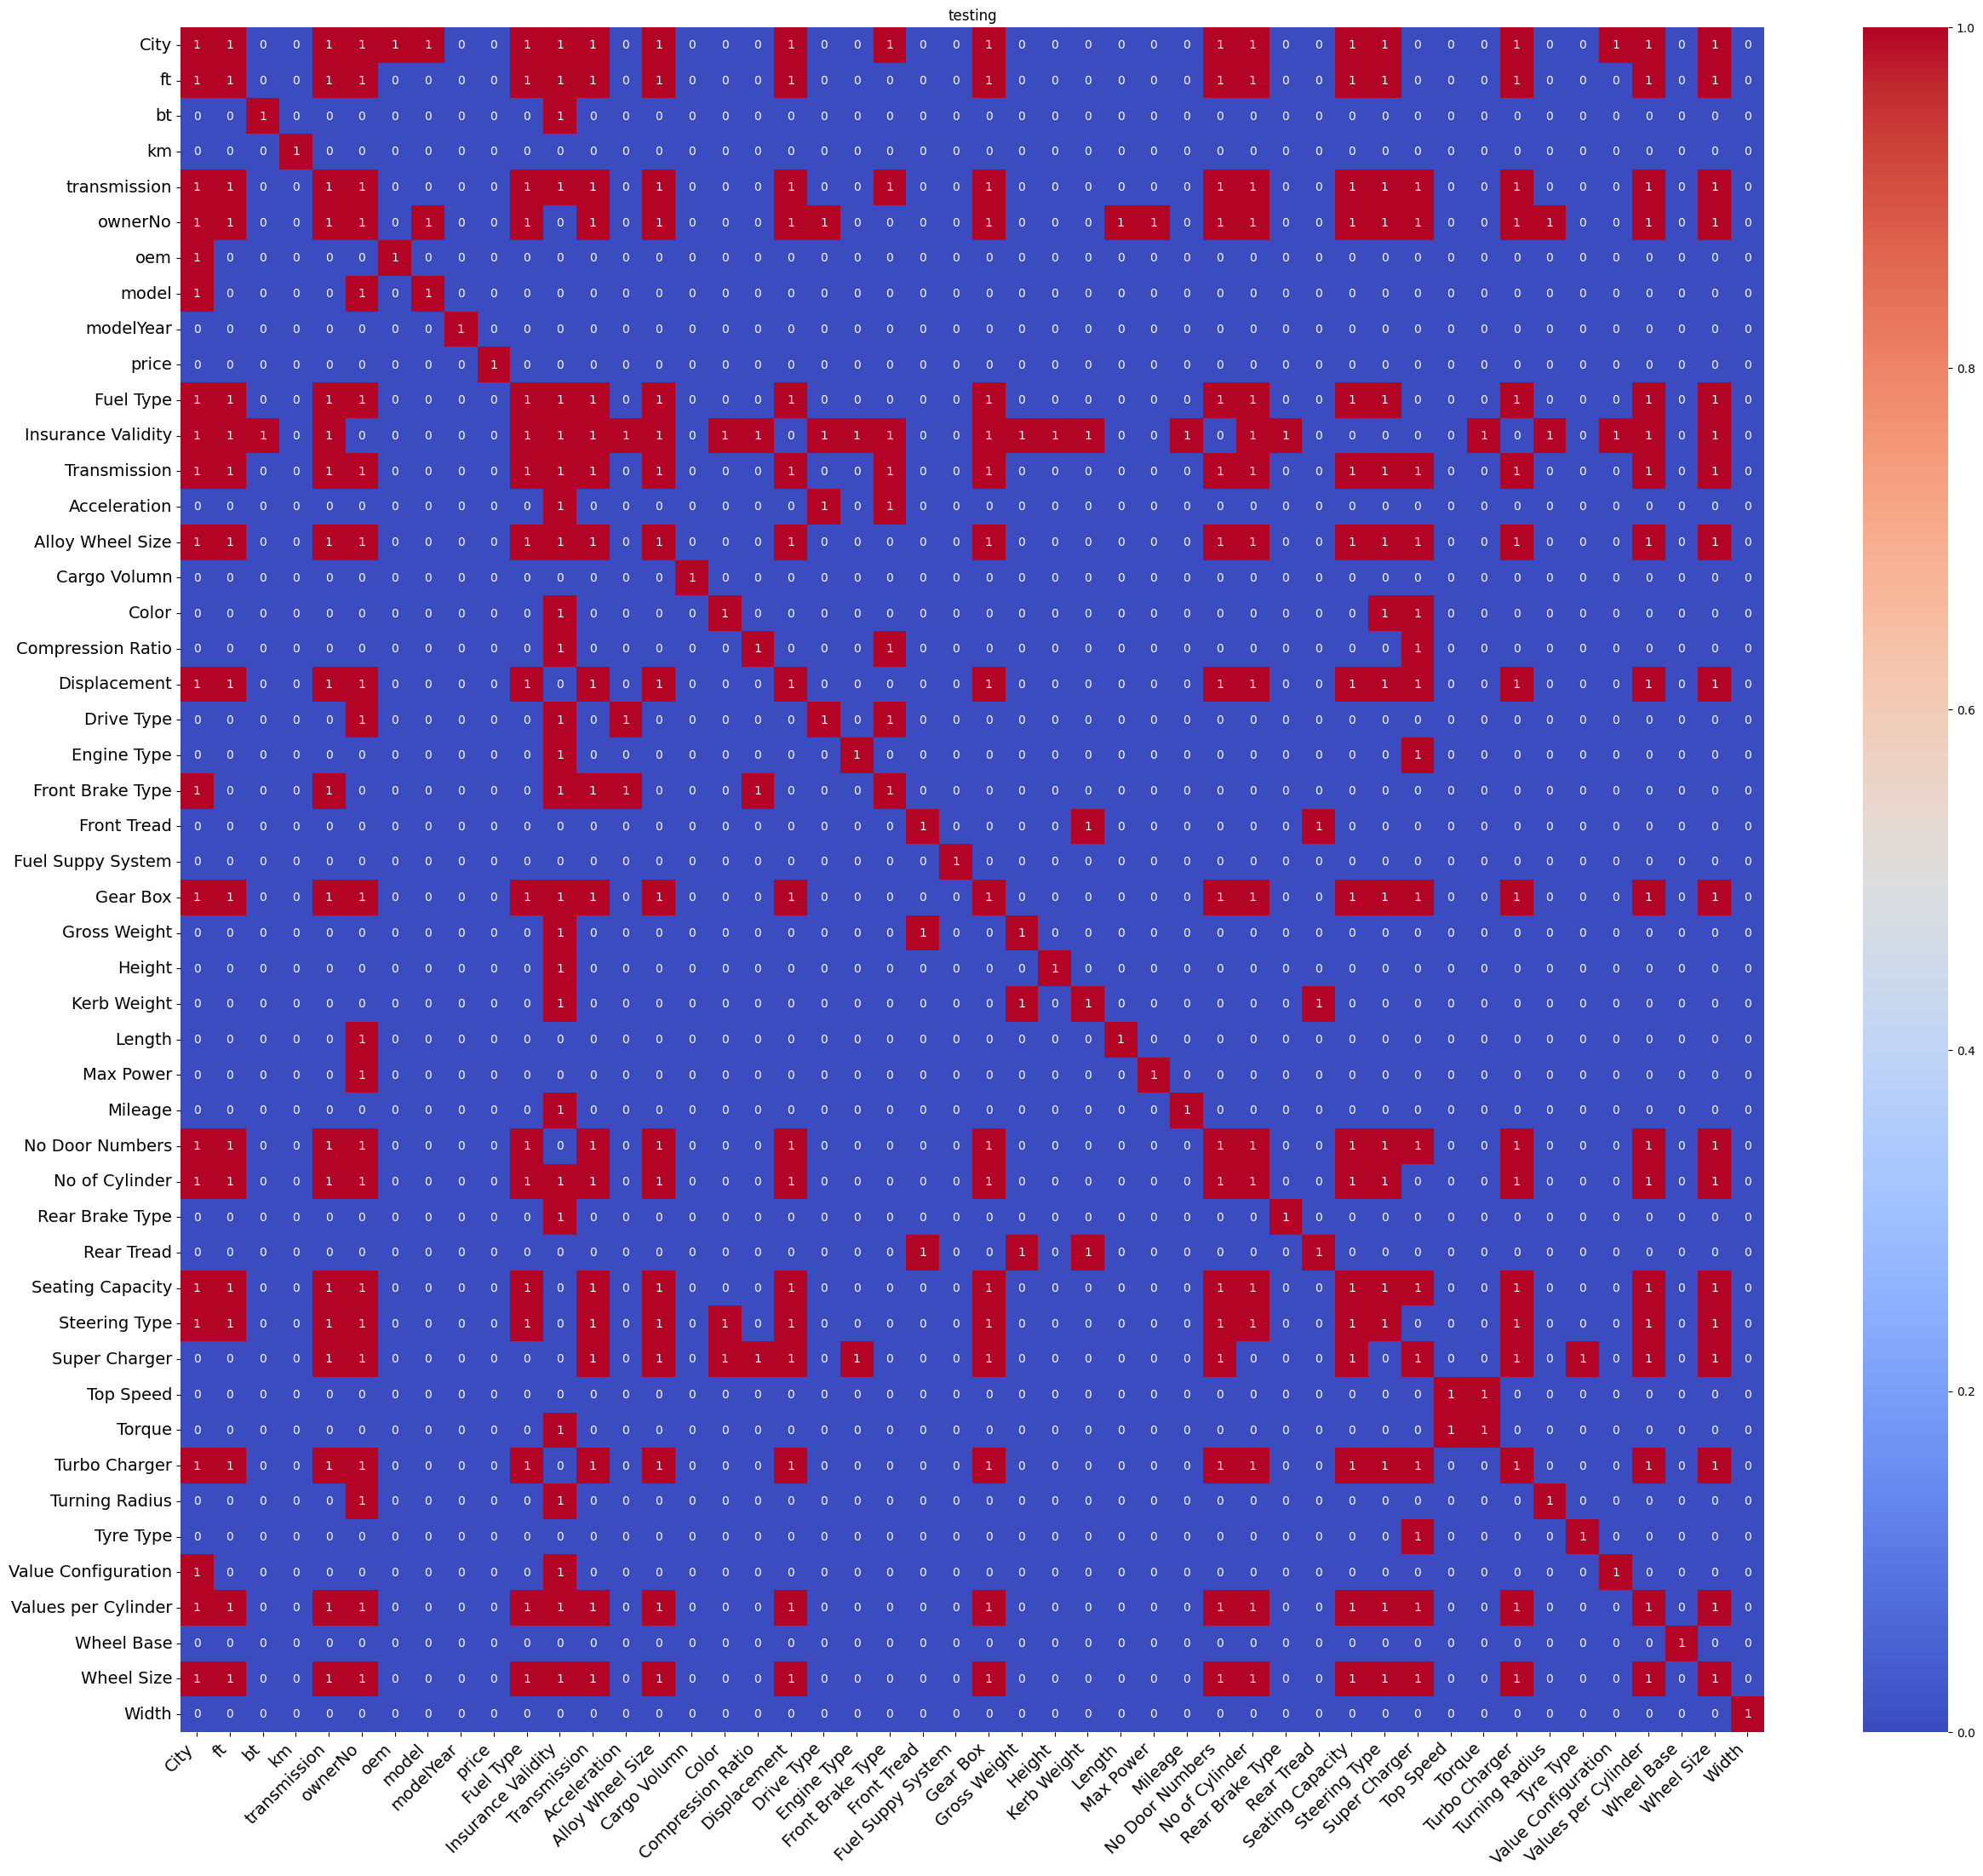

In [ ]:
#hypotheses testing
import seaborn as sns
plt.figure(figsize=(30, 26))
sns.heatmap(final_df,cmap="coolwarm",annot=True)
plt.xticks(rotation=45, ha='right', fontsize=14)  # Rotate x labels
plt.yticks(rotation=0, fontsize=14)  # Rotate y labels
# Add a title
plt.title('testing')

# Display the heatmap
plt.show()

Scikit-learn version: 1.5.1


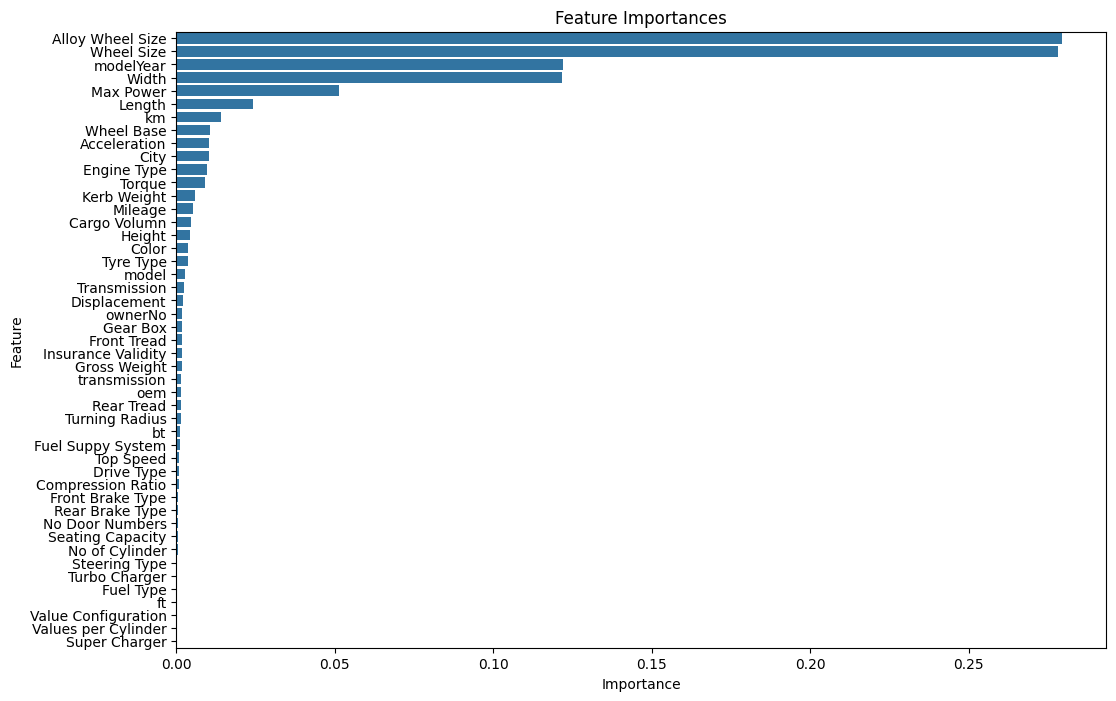

In [ ]:
#to find feature importance using random forest regressor (PRICE CONTINUOUS)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

print("Scikit-learn version:", sklearn.__version__)
# Assuming df is your DataFrame and 'price' is your target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns  # Get feature names from the DataFrame

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()



Selected features based on importance:
13    Alloy Wheel Size
45          Wheel Size
8            modelYear
46               Width
28           Max Power
27              Length
3                   km
44          Wheel Base
12        Acceleration
0                 City
19         Engine Type
38              Torque
26         Kerb Weight
29             Mileage
14        Cargo Volumn
Name: Feature, dtype: object


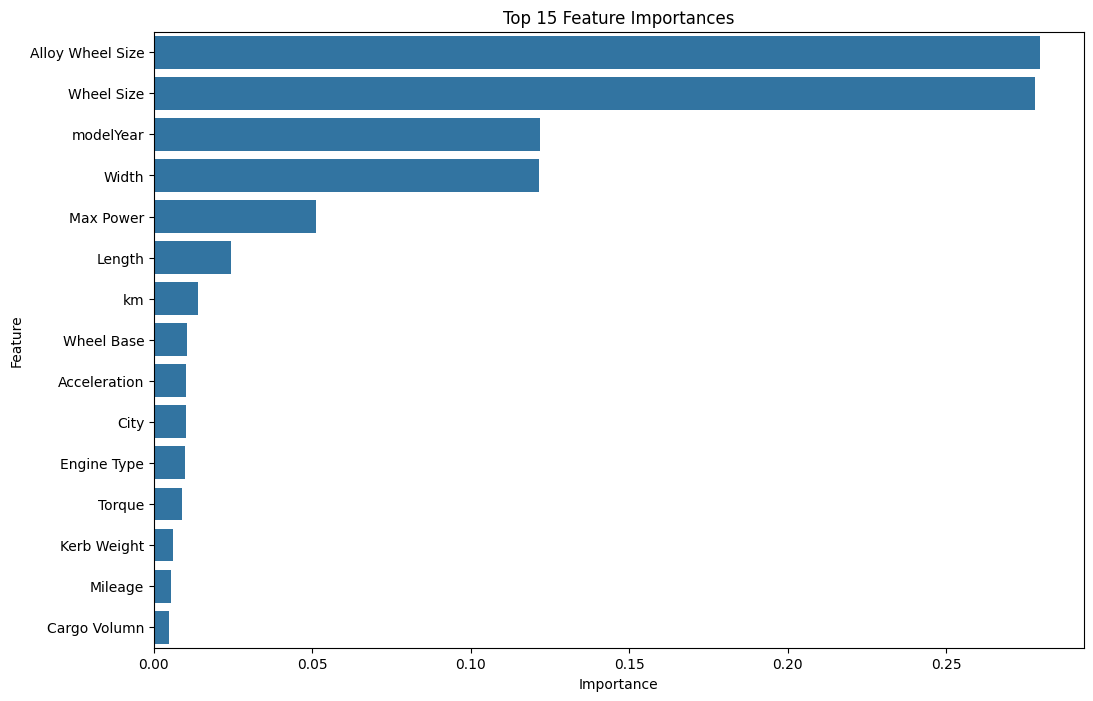

In [ ]:
# Define the number of top features to select
top_n = 15  # Change this to the desired number of top features

# Select the top 'n' features based on importance
top_features = feature_importances.head(top_n)['Feature']

# Filter the original dataset to keep only the top features
X_reduced = X[top_features]

# Print the selected features
print("Selected features based on importance:")
print(top_features)

# Optionally, you can also visualize the selected features
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(top_n))
plt.title('Top 15 Feature Importances')
plt.show()


In [ ]:
df.head(2)


,City,ft,bt,km,transmission,ownerNo,oem,model,modelYear,price,Fuel Type,Insurance Validity,Transmission,Acceleration,Alloy Wheel Size,Cargo Volumn,Color,Compression Ratio,Displacement,Drive Type,Engine Type,Front Brake Type,Front Tread,Fuel Suppy System,Gear Box,Gross Weight,Height,Kerb Weight,Length,Max Power,Mileage,No Door Numbers,No of Cylinder,Rear Brake Type,Rear Tread,Seating Capacity,Steering Type,Super Charger,Top Speed,Torque,Turbo Charger,Turning Radius,Tyre Type,Value Configuration,Values per Cylinder,Wheel Base,Wheel Size,Width
0,0,4,3,120000.0,1,3,20,160,2015,400000.0,4,5,1,15.05,16.0,235.0,138,11.0,0,12,293,22,1420,53,5.0,1250.0,1565.0,835.0,3715.0,67.04,23.1,5.0,3,7,1410,5.0,6,1,154.5,90.0,0,4.7,23,3,4,2425,16.0,1635.0
1,0,4,8,32706.0,1,2,6,50,2018,811000.0,4,2,1,10.00,16.0,352.0,138,11.0,2,12,396,22,1295,23,5.0,1660.0,1647.0,1242.0,3998.0,121.31,17.0,4.0,3,7,1290,5.0,6,1,165.0,150.0,0,5.3,26,3,4,2519,16.0,1765.0


In [ ]:
#3) Model Development(since target is continuous regression used to develop ML)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
# Print the version of scikit-learn
print("Scikit-learn version:", sklearn.__version__)
# Assuming 'X' is the original feature set and 'y' is the target variable
# X_reduced is the dataset with the top selected features

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        "MSE": mse,
        "R2 Score": r2
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


Scikit-learn version: 1.5.1
                            MSE  R2 Score
Linear Regression  3.790537e+10  0.836366
Decision Tree      2.185519e+10  0.905653
Random Forest      1.121550e+10  0.951584
Gradient Boosting  1.428477e+10  0.938334


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the corrected parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used
}
# Print the version of scikit-learn
print("Scikit-learn version:", sklearn.__version__)
# Initialize the RandomizedSearchCV object for Random Forest
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=rf_param_grid,
    n_iter=50,                            # Number of parameter settings to sample
    cv=5,                                # 5-fold cross-validation
    scoring='r2',                        # Use R² score for evaluation
    n_jobs=-1,                           # Use all available cores
    verbose=2,                           # Print detailed output
    random_state=42                      # For reproducibility
)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Get the best parameters and the corresponding R² score
print("Best parameters for Random Forest:", rf_random_search.best_params_)
print("Best R2 score for Random Forest:", rf_random_search.best_score_)

# Evaluate the best model on the test set
best_rf_model = rf_random_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"Tuned Random Forest MSE: {rf_mse}")
print(f"Tuned Random Forest R2 Score: {rf_r2}")


Scikit-learn version: 1.5.1
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'bootstrap': True}
Best R2 score for Random Forest: 0.9416260770850691
Tuned Random Forest MSE: 11215502334.111502
Tuned Random Forest R2 Score: 0.951583613965665


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score
# Print the version of scikit-learn
print("Scikit-learn version:", sklearn.__version__)
# Define the parameter distributions for Gradient Boosting
gb_param_dist = {
    'n_estimators': randint(50, 200),            # Number of boosting stages to be run
    'learning_rate': uniform(0.01, 0.2),         # Learning rate shrinks the contribution of each tree
    'max_depth': randint(3, 10),                 # Maximum depth of the individual trees
    'min_samples_split': randint(2, 10),          # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4),            # Minimum number of samples required to be at a leaf node
    'subsample': uniform(0.8, 0.2)                # Fraction of samples used to fit each tree
}

# Initialize the RandomizedSearchCV object for Gradient Boosting
gb_random_search = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_distributions=gb_param_dist,
    n_iter=30,                # Number of parameter settings to sample
    cv=5,                     # 5-fold cross-validation
    scoring='r2',             # Use R² score for evaluation
    n_jobs=-1,                # Use all available cores
    verbose=2,                # Print detailed output
    random_state=42           # Ensure reproducibility
)

# Fit the model
gb_random_search.fit(X_train, y_train)

# Get the best parameters and the corresponding R² score
print("Best parameters for Gradient Boosting:", gb_random_search.best_params_)
print("Best R2 score for Gradient Boosting:", gb_random_search.best_score_)

# Evaluate the best model on the test set
best_gb_model = gb_random_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"Tuned Gradient Boosting MSE: {gb_mse}")
print(f"Tuned Gradient Boosting R2 Score: {gb_r2}")

import joblib
from sklearn.ensemble import GradientBoostingRegressor

joblib.dump(model, 'tuned_gradient_boosting_model.pkl')


Scikit-learn version: 1.5.1
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.14376825053272146, 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 153, 'subsample': 0.8549443585980129}
Best R2 score for Gradient Boosting: 0.9478624228275214
Tuned Gradient Boosting MSE: 9796075082.3646
Tuned Gradient Boosting R2 Score: 0.9577111627566999


['tuned_gradient_boosting_model.pkl']

In [ ]:
from google.colab import files

# Download the file
files.download('tuned_gradient_boosting_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#model comparison to find best model

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Assuming X_train, X_test, y_train, y_test are already defined
# Assuming the tuned models have been fitted already:
# best_rf_model for RandomForestRegressor
# best_gb_model for GradientBoostingRegressor

# Models dictionary including the tuned models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest (Tuned)": best_rf_model,
    "Gradient Boosting (Tuned)": best_gb_model
}

# To store the evaluation results
results = {}

for name, model in models.items():
    # Fit the model if it's not tuned
    if 'Tuned' not in name:
        model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "R2 Score": r2
    }

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results).T

# Print the results for comparison
print(results_df)


                                     MAE           MSE  R2 Score
Linear Regression          142710.009049  3.790537e+10  0.836366
Decision Tree               87686.134083  2.185519e+10  0.905653
Random Forest (Tuned)       66986.801326  1.121550e+10  0.951584
Gradient Boosting (Tuned)   62735.237827  9.796075e+09  0.957711


In [ ]:
import sklearn
print(sklearn.__version__)

1.5.1
